In [1]:
import matplotlib.pyplot as plt
import neuropacks as packs
import numpy as np
import mpl_lego as mplego
import os
from settings import ax_label_size, tick_label_size, letter_size

from noise_correlations import analysis, utils
from mpl_lego.colors import hex_to_rgb
from mpl_lego.ellipse import plot_cov_ellipse

%matplotlib inline

In [2]:
ccycle = mplego.colors.get_default_ccycle()

In [3]:
base_path = '/storage/noise_correlations'

In [4]:
# PVC11 paths
pvc11_1_path = os.path.join(base_path, 'pvc11/data/spikes_gratings/data_monkey1_gratings.mat')
# Create neuropacks
pvc11_1 = packs.PVC11(data_path=pvc11_1_path)
# Load response matrices
X_pvc11_1 = pvc11_1.get_response_matrix(transform=None)
# Extract stimuli
stimuli_pvc11 = pvc11_1.get_design_matrix(form='angle')

In [5]:
# RET2 path
ret2_path = os.path.join(base_path, 'ret2/200114_fov1_data.mat')
# Create neuropack
ret2 = packs.RET2(data_path=ret2_path)
# Load response matrix
X_ret2 = ret2.get_response_matrix(cells='tuned', response='max')
# Extract stimuli
stimuli_ret2 = ret2.angles
unique_stimuli_ret2 = ret2.unique_angles

In [7]:
# ECoG path
ecog_path = os.path.join(base_path, 'ecog/r32_b7.mat')
# Create neuropack
ecog = packs.ECOG(data_path=ecog_path)
# Load response matrix
X_ecog = ecog.get_response_matrix(
    bounds=[40, 60],
    band='HG',
    electrodes=ecog.pac_idxs)
# Extract stimuli
stimuli_ecog = ecog.get_design_matrix('frequency')
unique_stimuli_ecog = np.unique(stimuli_ecog)

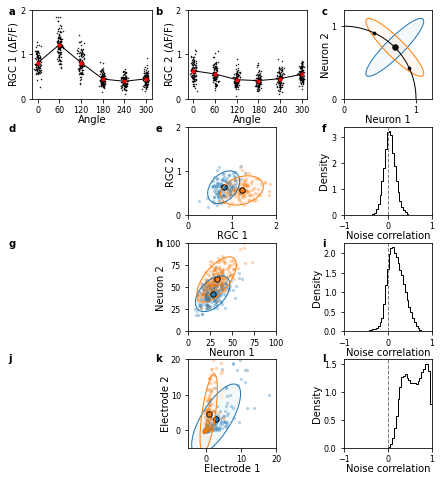

In [19]:
# Style settings
n_std = 0.6 # N. std for cov ellipses
cov_alpha = 0.5 # Opacity for cov ellipses
s_cov = 100 # Mean cov. scatter size
data_alpha = 0.25 # Opacity for data points
data_std = 2. # N. std for data ellipses
hist_linewidth = 1
mu_scatter_size = 30

# Create figure
figsize = (6, 6.5)
fig = plt.figure(figsize=figsize)
le = .065
re = .01
be = .055
te = .01
vg = .06
hg2 = .09
w2 = (1. - le - re - hg2) / 2.
h = (1. - te - be - 3*vg) / 4.
w3 = h * figsize[1] / figsize[0]
hg3 = (1. - le - re - 3*w3) / 2.

axes = np.empty((4, 3), dtype=object)
for ii in range(1, 4):
    for jj in range(3):
        axes[ii, jj] = fig.add_axes([le + jj*(w3 + hg3), be + (3 - ii)*(h + vg), w3, h])
axes[0, 2] = fig.add_axes([le + 2*(w3 + hg3), be +3*(h + vg), w3, h])
scale = 1.35
axes[0, 0] = fig.add_axes([le, be +3*(h + vg), w3*scale, h])
axes[0, 1] = fig.add_axes([le + (w3 + hg3), be +3*(h + vg), w3*scale, h])

# Axis indices
ret_idx = 1
pvc_idx = 2
ecog_idx = 3

"""
RET2 example
"""
units = [32, 25]
stims = [0, 60]
# X1, X2 = utils.get_dimstim_responses(X_ret2, stimuli_ret2, units, stims)
# x = np.random.randn(X1.shape[0])*5 + np.ones_like(X1[:, 0])*stims[0]
# axes[0, 1].scatter(x, X1[:, 0],
#                    c='k', marker='.', s=1)
# axes[0, 2].scatter(x, X1[:, 1],
#                    c='k', marker='.', s=1)
mean0 = []
mean1 = []
np.random.seed(0)
for s in unique_stimuli_ret2:
    X1, _ = utils.get_dimstim_responses(X_ret2, stimuli_ret2, units, [s, s])
    x = np.random.randn(X1.shape[0])*4 + np.ones_like(X1[:, 0])*s
    axes[0, 0].scatter(x, X1[:, 0],
                       c='k', marker='.', s=1)
    axes[0, 1].scatter(x, X1[:, 1],
                       c='k', marker='.', s=1)
    mu = np.mean(X1, axis=0)
    mean0.append(mu[0])
    mean1.append(mu[1])
axes[0, 0].plot(unique_stimuli_ret2, mean0, c='k', marker='.',
                lw=1, markerfacecolor='r', markeredgecolor='r')
axes[0, 1].plot(unique_stimuli_ret2, mean1, c='k', marker='.',
                lw=1, markerfacecolor='r', markeredgecolor='r')
for ax in axes[0, :-1]:
    ax.set_xlabel('Angle', size=ax_label_size, labelpad=0)
    ax.set_ylim(0, 2.)
    ax.set_yticks([0, 1, 2])
    ax.set_xticks([0, 60, 120, 180, 240, 300])
axes[0, 0].set_ylabel(r'RGC 1 ($\Delta$F/F)', size=ax_label_size, labelpad=0)
axes[0, 1].set_ylabel('RGC 2 ($\Delta$F/F)', size=ax_label_size, labelpad=0)
for ax in axes[0, :2]:
    ax.set_xlim(-15, 315)

center = 1 / np.sqrt([2, 2])
angles = np.linspace(0, np.pi/2., 1000)
n1 = np.cos(angles)
n2 = np.sin(angles)
axes[0, 2].plot(n1, n2,
        color='black',
        linewidth=1)
axes[0, 2].set_xlim([0, 1.22])
axes[0, 2].set_ylim([0, 1.22])
cov = np.array([[1, .9], [.9, 1]])
plot_cov_ellipse(
cov,
mu=center,
n_std=.4,
facecolor=hex_to_rgb(ccycle[0], 0.05),
edgecolor=hex_to_rgb(ccycle[0], 1.0),
ax=axes[0, 2])
cov = np.array([[1, -.9], [-.9, 1]])
plot_cov_ellipse(
cov,
mu=center,
n_std=.4,
facecolor=hex_to_rgb(ccycle[1], 0.05),
edgecolor=hex_to_rgb(ccycle[1], 1.0),
ax=axes[0, 2])
axes[0, 2].scatter(*center, c='k', s=mu_scatter_size)
axes[0, 2].set_xlabel(r'Neuron 1', fontsize=ax_label_size, labelpad=0)
axes[0, 2].set_ylabel(r'Neuron 2', fontsize=ax_label_size, labelpad=0)
axes[0, 2].set_xticks([0, 1])
axes[0, 2].set_yticks([0, 1])

axes[0, 2].scatter([n1[275]], [n2[275]], c='k', marker='o', s=8)
axes[0, 2].scatter([n1[-275]], [n2[-275]], c='k', marker='o', s=8)

"""
RET2 Dataset
"""
# RET2, Column 1: Example responses
ret_ex_ax = axes[ret_idx, 1]
X1, X2 = utils.get_dimstim_responses(X_ret2, stimuli_ret2, units, stims)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

ret_ex_ax.scatter(
    X1[:, 0],
    X1[:, 1],
    color=ccycle[0],
    alpha=data_alpha,
    marker='.',
    s=20)
plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=mu1,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[0], 0.05),
    edgecolor=hex_to_rgb(ccycle[0], 1.0),
    ax=ret_ex_ax)
plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=mu2,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[1], 0.05),
    edgecolor=hex_to_rgb(ccycle[1], 1.0),
    ax=ret_ex_ax)
ret_ex_ax.scatter(
    X2[:, 0],
    X2[:, 1],
    color=ccycle[1],
    alpha=data_alpha,
    marker='.',
    s=20)
ret_ex_ax.scatter(
    mu1[0], mu1[1],
    color=ccycle[0],
    s=mu_scatter_size,
    edgecolor='black')
ret_ex_ax.scatter(
    mu2[0], mu2[1],
    color=ccycle[1],
    s=mu_scatter_size,
    edgecolor='black')

ret_ex_ax.set_xlim([0., 2])
ret_ex_ax.set_ylim(ret_ex_ax.get_xlim())
ret_ex_ax.set_xticks([0., 1, 2.])
ret_ex_ax.set_yticks(ret_ex_ax.get_xticks())
ret_ex_ax.set_xlabel(r'RGC 1', fontsize=ax_label_size, labelpad=0)
ret_ex_ax.set_ylabel(r'RGC 2', fontsize=ax_label_size, labelpad=0)

# RET2, Column 3: Noise correlation distribution
ret_nc_ax = axes[ret_idx, 2]
nc_ret2 = analysis.all_correlations(X_ret2, stimuli_ret2)
bins = np.linspace(-1, 1, 50)
ret_nc_ax.hist(
    nc_ret2,
    bins=bins,
    density=True,
    color='black',
    histtype='step',
    linewidth=hist_linewidth)

"""
PVC11 Dataset
"""
# PVC11, Column 1: Example responses of two neurons
pvc_ex_ax = axes[pvc_idx, 1]

stims = [0, 30]
units = [57, 34]
X1, X2 = utils.get_dimstim_responses(X_pvc11_1, stimuli_pvc11, units, stims)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

pvc_ex_ax = plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=mu1,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[0], 0.05),
    edgecolor=hex_to_rgb(ccycle[0], 1.0),
    ax=pvc_ex_ax)
pvc_ex_ax = plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=mu2,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[1], 0.05),
    edgecolor=hex_to_rgb(ccycle[1], 1.0),
    ax=pvc_ex_ax)
pvc_ex_ax.scatter(
    X1[:, 0],
    X1[:, 1],
    color=ccycle[0],
    alpha=data_alpha,
    marker='.',
    s=20)
pvc_ex_ax.scatter(
    X2[:, 0],
    X2[:, 1],
    color=ccycle[1],
    alpha=data_alpha,
    marker='.',
    s=20)
pvc_ex_ax.scatter(
    mu1[0], mu1[1],
    color=ccycle[0],
    s=mu_scatter_size,
    edgecolor='black')
pvc_ex_ax.scatter(
    mu2[0], mu2[1],
    color=ccycle[1],
    s=mu_scatter_size,
    edgecolor='black')

pvc_ex_ax.set_xlim([0., 100])
pvc_ex_ax.set_ylim([0, 100])
pvc_ex_ax.set_xticks([0, 25, 50, 75, 100])
pvc_ex_ax.set_yticks(pvc_ex_ax.get_xticks())
pvc_ex_ax.set_xlabel(r'Neuron 1', fontsize=ax_label_size, labelpad=0)
pvc_ex_ax.set_ylabel(r'Neuron 2', fontsize=ax_label_size, labelpad=0)

# PVC11, Column 3: Distribution of noise correlations
pvc11_nc_ax = axes[pvc_idx, 2]
# Calculate distribution of noise correlations
nc_pvc11_1 = analysis.all_correlations(X_pvc11_1, stimuli_pvc11)
# Plot distributions as density histograms
bins = np.linspace(-1, 1, 50)
pvc11_nc_ax.hist(
    nc_pvc11_1,
    bins=bins,
    density=True,
    color='black',
    histtype='step',
    linewidth=hist_linewidth)

"""
ECOG Dataset
"""
# ECOG, Column 2: Example responses
ecog_ex_ax = axes[ecog_idx, 1]

units = [13, 37]
stims = [1024, 2795]
X1, X2 = utils.get_dimstim_responses(X_ecog, stimuli_ecog, units, stims)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

ecog_ex_ax.scatter(
    X1[:, 0],
    X1[:, 1],
    color=ccycle[0],
    alpha=data_alpha,
    marker='.',
    s=20)
plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=mu1,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[0], 0.05),
    edgecolor=hex_to_rgb(ccycle[0], 1.0),
    ax=ecog_ex_ax)
plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=mu2,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[1], 0.05),
    edgecolor=hex_to_rgb(ccycle[1], 1.0),
    ax=ecog_ex_ax)
ecog_ex_ax.scatter(
    X2[:, 0],
    X2[:, 1],
    color=ccycle[1],
    alpha=data_alpha,
    marker='.',
    s=20)
ecog_ex_ax.scatter(
    mu1[0], mu1[1],
    color=ccycle[0],
    s=mu_scatter_size,
    edgecolor='black')
ecog_ex_ax.scatter(
    mu2[0], mu2[1],
    color=ccycle[1],
    s=mu_scatter_size,
    edgecolor='black')

ecog_ex_ax.set_xlim(-5, 20)
ecog_ex_ax.set_ylim(ecog_ex_ax.get_xlim())
ecog_ex_ax.set_xticks([0, 10, 20])
ecog_ex_ax.set_yticks(ecog_ex_ax.get_xticks())
ecog_ex_ax.set_xlabel(r'Electrode 1', fontsize=ax_label_size, labelpad=0)
ecog_ex_ax.set_ylabel(r'Electrode 2', fontsize=ax_label_size, labelpad=0)

# ECOG, Column 3: Noise correlation distribution
ecog_nc_ax = axes[ecog_idx, 2]
nc_ecog = analysis.all_correlations(X_ecog, stimuli_ecog)
bins = np.linspace(-1, 1, 50)
ecog_nc_ax.hist(
    nc_ecog,
    bins=bins,
    density=True,
    color='black',
    histtype='step',
    linewidth=hist_linewidth)

for ax in axes[1:, 2]:
    ax.set_xlim([-1, 1])
    ax.set_xlabel(r'Noise correlation', fontsize=ax_label_size, labelpad=0)
    ax.set_ylabel(r'Density', fontsize=ax_label_size, labelpad=2)
    ax.axvline(0, linestyle='--', color='grey', lw=1)

"""
Global Settings
"""
# Set axis tick label size
for ax in axes.ravel():
    ax.tick_params(labelsize=tick_label_size)
# Leftmost plot (after first row): brain image, clear out space
for ax in axes[1:, 0]:
    ax.axis(False)
# Apply subplot labels
xs = [.01, .35, .735]
ys = [.98, .73, .485, .24]
#fig.text(xs[0], .98, 'a', size=letter_size, fontweight='bold')
#fig.text(xs[1], .98, 'b', size=letter_size, fontweight='bold')
lets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
c = 0
for jj in range(4):
    for ii in range(3):
        fig.text(xs[ii], ys[jj], lets[c], size=letter_size, fontweight='bold')
        c += 1

plt.savefig('figure1.pdf', dpi=300)
plt.savefig('figure1.jpg', dpi=300)
plt.show()